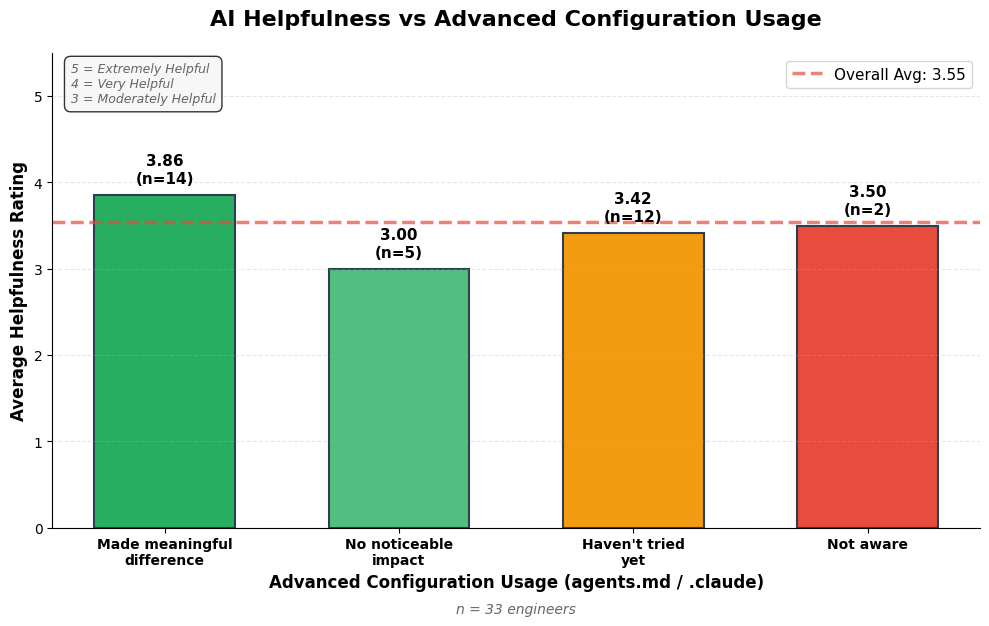


ADVANCED CONFIGURATION vs AI HELPFULNESS ANALYSIS

📊 Overall Average Helpfulness: 3.55/5.0
   Total Engineers: 33

📈 Helpfulness by Advanced Configuration Usage:
Category                                           Avg Rating   Count    vs Avg    
Yes -- and it made a meaningful difference         3.86         14       +0.31     
Yes -- but I didn't notice much impact             3.00         5        -0.55     
No -- I know it's possible but haven't taken the time 3.42         12       -0.13     
No -- I wasn't aware that was possible             3.50         2        -0.05     

✨ Key Insights:
   • Engineers who tried advanced config: 3.63/5.0 (n=19)
   • Engineers who haven't tried: 3.43/5.0 (n=14)
   • Difference: 0.20 points

   🏆 Those who found meaningful difference: 3.86/5.0 (n=14)
      That's 0.31 points above average!

   💡 Opportunity: 14 engineers (42%) haven't tried advanced config
      If they achieved similar results, average helpfulness could increase significantly




In [ ]:
#use imformation from Q5
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
df = pd.read_csv('../responses.csv')

# Filter out non-engineering teams
teams_to_exclude = ['Customer Solutions', 'Customer Support', 'Pre-Sales']
df_filtered = df[~df['Which team are you a part of?'].isin(teams_to_exclude)].copy()

# Get column names
agents_col = df_filtered.columns[16]  # Column Q - agents.md/.claude usage
helpfulness_col = 'On a scale of 1 to 5, how would you rate the overall helpfulness of AI in your daily development tasks?'

# Create numeric mapping for helpfulness
rating_values = {
    'Extremely Helpful': 5,
    'Very Helpful': 4,
    'Moderately Helpful': 3,
    'Slightly Helpful': 2,
    'Not Helpful': 1
}

df_filtered['rating_numeric'] = df_filtered[helpfulness_col].map(rating_values)

# Define agents.md order
agents_order = [
    'Yes -- and it made a meaningful difference',
    'Yes -- but I didn\'t notice much impact',
    'No -- I know it\'s possible but haven\'t taken the time',
    'No -- I wasn\'t aware that was possible'
]

# Calculate average helpfulness by agents.md response
avg_by_agents = df_filtered.groupby(agents_col)['rating_numeric'].agg(['mean', 'count', 'std'])
avg_by_agents = avg_by_agents.reindex(agents_order)

# Calculate overall average
overall_avg = df_filtered['rating_numeric'].mean()

# Create figure
fig, ax = plt.subplots(figsize=(10, 6.4))

# Define appealing colors
colors = ['#27AE60', '#52BE80', '#F39C12', '#E74C3C']

# Shortened labels for x-axis
x_labels = [
    'Made meaningful\ndifference',
    'No noticeable\nimpact',
    'Haven\'t tried\nyet',
    'Not aware'
]

# Create bar chart
x_pos = np.arange(len(agents_order))
bars = []
for i, (response, color, label) in enumerate(zip(agents_order, colors, x_labels)):
    if response in avg_by_agents.index and not pd.isna(avg_by_agents.loc[response, 'mean']):
        avg = avg_by_agents.loc[response, 'mean']
        count = int(avg_by_agents.loc[response, 'count'])
        bar = ax.bar(i, avg, color=color, edgecolor='#2C3E50', linewidth=1.5, width=0.6)
        bars.append(bar)
        
        # Add value label
        ax.text(i, avg + 0.1, f'{avg:.2f}\n(n={count})', 
               ha='center', va='bottom', fontsize=11, weight='bold')
    else:
        # No data for this category
        bar = ax.bar(i, 0, color='#CCCCCC', edgecolor='#2C3E50', linewidth=1.5, width=0.6, alpha=0.3)
        bars.append(bar)
        ax.text(i, 0.1, 'No data', ha='center', va='bottom', fontsize=9, style='italic', color='#666666')

# Add overall average line
ax.axhline(overall_avg, color='#E74C3C', linestyle='--', linewidth=2.5, 
          alpha=0.7, label=f'Overall Avg: {overall_avg:.2f}')

# Customize plot
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels, fontsize=10, weight='bold')
ax.set_ylabel('Average Helpfulness Rating', fontsize=12, weight='bold')
ax.set_xlabel('Advanced Configuration Usage (agents.md / .claude)', fontsize=12, weight='bold')
ax.set_title('AI Helpfulness vs Advanced Configuration Usage', 
            fontsize=16, weight='bold', pad=20)
ax.set_ylim(0, 5.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=11, loc='upper right')
ax.grid(axis='y', alpha=0.3, linestyle='--')

# Add rating scale reference
ax.text(0.02, 0.98, '5 = Extremely Helpful\n4 = Very Helpful\n3 = Moderately Helpful', 
        transform=ax.transAxes, ha='left', va='top',
        fontsize=9, style='italic', color='#666666',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='#F5F5F5', alpha=0.8))

# Add subtitle
plt.text(0.5, -0.18, f'n = {len(df_filtered)} engineers', 
         ha='center', transform=ax.transAxes,
         fontsize=10, style='italic', color='#666666')

plt.tight_layout()
plt.show()

# Print detailed summary
print("\n" + "="*80)
print("ADVANCED CONFIGURATION vs AI HELPFULNESS ANALYSIS")
print("="*80)

print(f"\n📊 Overall Average Helpfulness: {overall_avg:.2f}/5.0")
print(f"   Total Engineers: {len(df_filtered)}")

print(f"\n📈 Helpfulness by Advanced Configuration Usage:")
print(f"{'Category':<50} {'Avg Rating':<12} {'Count':<8} {'vs Avg':<10}")
print("="*80)

for response in agents_order:
    if response in avg_by_agents.index and not pd.isna(avg_by_agents.loc[response, 'mean']):
        avg = avg_by_agents.loc[response, 'mean']
        count = int(avg_by_agents.loc[response, 'count'])
        diff = avg - overall_avg
        comparison = f"+{diff:.2f}" if diff > 0 else f"{diff:.2f}"
        
        print(f"{response:<50} {avg:<12.2f} {count:<8} {comparison:<10}")
    else:
        print(f"{response:<50} {'N/A':<12} {'0':<8} {'N/A':<10}")

# Calculate key insights
tried_configs = df_filtered[df_filtered[agents_col].isin(agents_order[:2])]
not_tried = df_filtered[df_filtered[agents_col].isin(agents_order[2:])]

if len(tried_configs) > 0:
    tried_avg = tried_configs['rating_numeric'].mean()
    tried_count = len(tried_configs)
    
    not_tried_avg = not_tried['rating_numeric'].mean() if len(not_tried) > 0 else 0
    not_tried_count = len(not_tried)
    
    print(f"\n✨ Key Insights:")
    print(f"   • Engineers who tried advanced config: {tried_avg:.2f}/5.0 (n={tried_count})")
    if not_tried_avg > 0:
        print(f"   • Engineers who haven't tried: {not_tried_avg:.2f}/5.0 (n={not_tried_count})")
        print(f"   • Difference: {tried_avg - not_tried_avg:.2f} points")
    
    # Meaningful difference group
    meaningful = df_filtered[df_filtered[agents_col] == agents_order[0]]
    if len(meaningful) > 0:
        meaningful_avg = meaningful['rating_numeric'].mean()
        meaningful_count = len(meaningful)
        print(f"\n   🏆 Those who found meaningful difference: {meaningful_avg:.2f}/5.0 (n={meaningful_count})")
        print(f"      That's {meaningful_avg - overall_avg:.2f} points above average!")
    
    # Calculate opportunity
    aware_not_tried = df_filtered[df_filtered[agents_col] == agents_order[2]]
    not_aware = df_filtered[df_filtered[agents_col] == agents_order[3]]
    opportunity_count = len(aware_not_tried) + len(not_aware)
    
    print(f"\n   💡 Opportunity: {opportunity_count} engineers ({opportunity_count/len(df_filtered)*100:.0f}%) haven't tried advanced config")
    print(f"      If they achieved similar results, average helpfulness could increase significantly")

print("\n" + "="*80 + "\n")